#Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

A practice in the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). I attempt to predict the housing prices in Ames, Iowa.

#Step 1: Understand the Problem
In this codeathon, we are attempting to predict housing prices in Ames, Iowa using Machine Learning techniques. Specifically, this problem is a **regression** problem because we are looking to predict a set value (SalePrice). In finer details, this problem is considered both a **multiple regression** task, because we are using multiple features in a prediction, and a **univeriate regression** problem because we are solving for one value (again, SalePrice). Additionally, this problem is a **supervised learning task** because the training data is labeled.</br></br>
We expect to find **one or more features that predict the SalePrice** of a given house in Ames, Iowa. The company should be able to use this model to **estimate the house price of any house within Ames** with a **95%** confidence. Thus, the company will benefit because the **algorithm would reduce time and costs used by the current solution** (agents researching constantly). In order to measure the estimation accuracy, we will use **Root Mean Square Error (RMSE)** and **five-fold cross-validation** to determine the amount of error in the predictions.</br></br>
To build the algorithm, **data is scrapped from Kaggle**. The data is organized into a csv and contains 1,460 entries of labeled categories and sample data.</br></br> 

To explore the best algorithm possible, **LinearRegression**, **DecisionTreeRegression**, and **RandomForestRegression** will be utilized as the learning algorithms. Specifically for the results, RandomForestRegression will be used. <br></br>

This codeathon took about **8 hours** from start to finish, which I would consider moderate effort. I took specific care to explore different algorithms (like a neural network model that proved too time-costly) that were extra beyond the three requirements. <br></br>

When I first began this project, I assumed that certain features would be more important than others. For example, I figured that the feature **"OverallQuality"**, which denotes the quality of the house (scale of 1 to 10 with 10, would be an important quality. Additionally, I assumed that **RandomForestRegression** would be the best learning method and the results below prove that assumption due to the RandomForestRegression low RMSE score.


In [ ]:
import numpy as np

## Step 2: Load the Data

In [ ]:
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData(housing_csv):
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv(housing_csv)
  return housing

# Call the function to load your dataset here
housing  = loadBostonHousingData("train.csv")
# display the first ten rows of the data for check
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# procide a quick summary of data w/ features, count, and types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# view the counts of each value in "LotArea" feature
housing["LotArea"].value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

In [ ]:
# provide basic statistics about the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### output from housing.info() <br>
How big is your dataset?<br> **0.924 MB** <br><br>
How many entries does it have?<br> **1460** <br><br>
How many features does it have?<br> **81 features, including id (80 features without id)** <br><br>
Does it contain any categorical data?<br> **Yes, like ["Neighborhoods"].** <br><br>
Is there any missing values?<br> **Yes, for example LotFrontage has only 1201 entries (instead of a full 1460).** <br><br>
What are some basic statistics you can learn right away about this dataset? <br>
**Some basic statistics include:** <br>
**The average overall quality of a house is 6.1/10, which may be the best feature to relate to final sale price.** <br>
**The average sale price of a house is $180,921.19.** <br>
**More statistics can be found above in the housing.describe() results.** <br>


## Step 3. Discover and visualize the data to gain insights


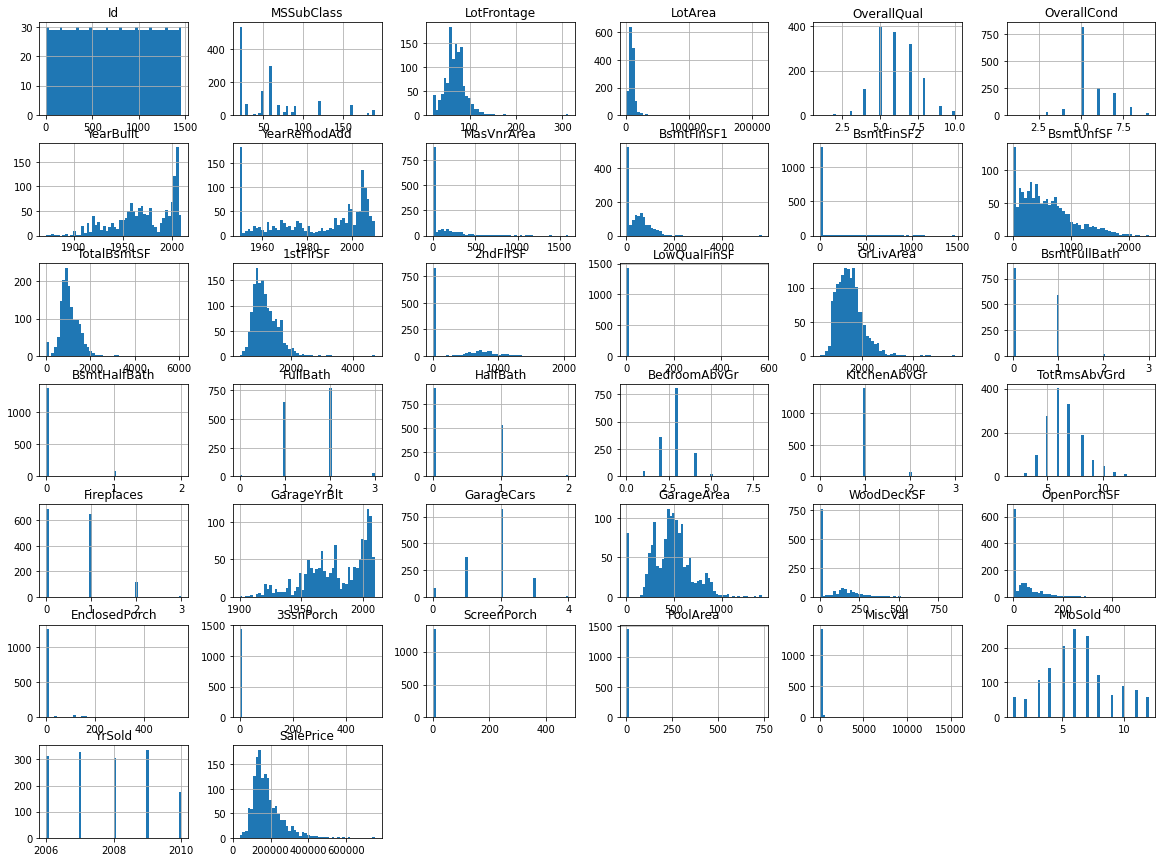

In [ ]:
# 1. plot out features in histograms to visualize the data
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

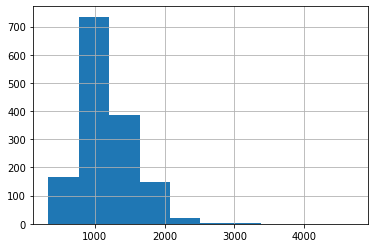

In [ ]:
# let's look at "1stFlrSF" due to the similar histograms between "1stFlrSF" and "SalePrice" (we're just taking a peek right now)
housing["1stFlrSF"].hist()

In [ ]:
# let's examine correlations (pearson (standard correlation coefficient)) and see what pops out
correlations = housing.corr()
correlations.shape
print(correlations)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [ ]:
# clearly, there are a lot of correlations to examine. let's zoom on correlations between features and SalePrice
correlations["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4a9099450>,
      dtype=object)

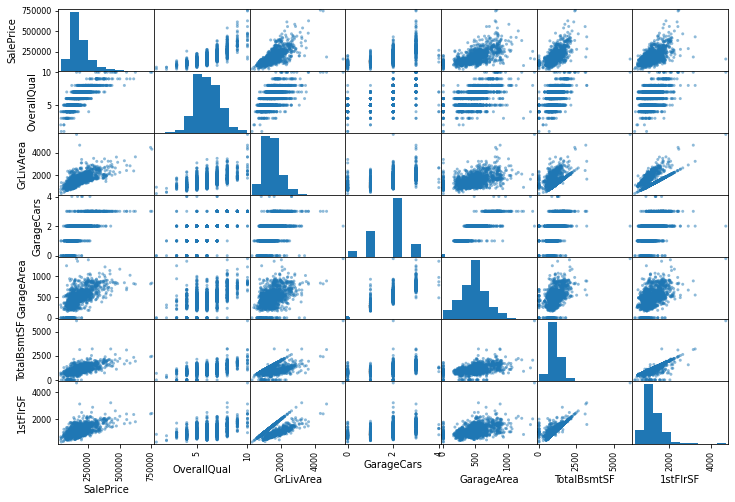

In [ ]:
# ah ha, now we're getting somewhere. a correlation of 1 descibes a strong position correlation, while a correlation of -1 indicates a strong negative correlation. 
# for example, "SalePrice" seems to rise as "OverallQual" (0.790982) rises while "SalePrice" decreases as "KitchenAbvGr" increases (-0.135907)
# let's scatter the top 6 positively-correlated plots for some ~ visualization ~
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
scatter_matrix(housing[attributes], figsize=(12,8))

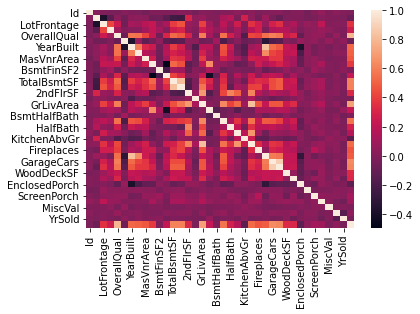

In [ ]:
# let's get a tad fancier thanks to some skills i picked up in my computational research project (bme benefits)
import seaborn as sns
sns.heatmap(correlations)

##  Step 4: Data Preparation and Cleaning

In [ ]:
# step 0. we will split the housing data into training set (80%) and testing set (20%)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print('training set', train_set.shape)
print('testing set', test_set.shape)

# and again for training and validation
train_set, valid_set = train_test_split(housing, test_size=0.2, random_state=42)
print('training set', train_set.shape)
print('validation set', valid_set.shape)

training set (1168, 81)
testing set (292, 81)
training set (1168, 81)
validation set (292, 81)


In [ ]:
train_set.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
303,304,20,RL,70.0,9800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Abnorml,149900
86,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
1385,1386,50,RM,40.0,5436,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125500
265,266,20,RL,78.0,12090,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,175500
793,794,20,RL,76.0,9158,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,225000


In [ ]:
# step 0a. create the features and labels for training
housing = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()

In [ ]:
from pickle import TRUE
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
# step 1. data cleaning: check if there are missing values
from sklearn.impute import SimpleImputer

incomplete = housing[housing.isnull().any(axis=1)].head()
print(incomplete)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
254    255          20       RL         70.0     8400   Pave   NaN      Reg   
1066  1067          60       RL         59.0     7837   Pave   NaN      IR1   
638    639          30       RL         67.0     8777   Pave   NaN      Reg   
799    800          50       RL         60.0     7200   Pave   NaN      Reg   
380    381          50       RL         50.0     5000   Pave  Pave      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
254          Lvl    AllPub  ...           0        0    NaN    NaN   
1066         Lvl    AllPub  ...           0        0    NaN    NaN   
638          Lvl    AllPub  ...           0        0    NaN  MnPrv   
799          Lvl    AllPub  ...           0        0    NaN  MnPrv   
380          Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
254          NaN       0      6    20

In [ ]:
# out of 1460 rows of data, 5 are incomplete (0.34% of the training data). let's replace all numerical values with the mean across each column so that we are not over or under estimating certain features 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# for the attributes that are strings, we're going to drop those attributes because again 0.34% of the data should not rely heavily on the string-based categories
housing_numbers = housing.select_dtypes(include=[np.number])

imputer.fit(housing_numbers)

SimpleImputer()

In [ ]:
# we're going to view the imputer's results as a check-in
imputer.statistics_

array([7.30904966e+02, 5.68493151e+01, 7.03438486e+01, 1.06896421e+04,
       6.12157534e+00, 5.58476027e+00, 1.97096575e+03, 1.98489726e+03,
       1.03771945e+02, 4.46023973e+02, 4.51523973e+01, 5.70595034e+02,
       1.06177140e+03, 1.16935445e+03, 3.52351027e+02, 5.69606164e+00,
       1.52740154e+03, 4.25513699e-01, 5.73630137e-02, 1.57705479e+00,
       3.81849315e-01, 2.89041096e+00, 1.04794521e+00, 6.56164384e+00,
       6.18150685e-01, 1.97866214e+03, 1.78167808e+00, 4.76273973e+02,
       9.59469178e+01, 4.95787671e+01, 2.18390411e+01, 3.81250000e+00,
       1.54075342e+01, 2.95547945e+00, 5.12671233e+01, 6.35616438e+00,
       2.00781849e+03])

In [ ]:
# let's check the stats to ensure that the imputer means and calculated means are equal
housing_numbers.mean().values

array([7.30904966e+02, 5.68493151e+01, 7.03438486e+01, 1.06896421e+04,
       6.12157534e+00, 5.58476027e+00, 1.97096575e+03, 1.98489726e+03,
       1.03771945e+02, 4.46023973e+02, 4.51523973e+01, 5.70595034e+02,
       1.06177140e+03, 1.16935445e+03, 3.52351027e+02, 5.69606164e+00,
       1.52740154e+03, 4.25513699e-01, 5.73630137e-02, 1.57705479e+00,
       3.81849315e-01, 2.89041096e+00, 1.04794521e+00, 6.56164384e+00,
       6.18150685e-01, 1.97866214e+03, 1.78167808e+00, 4.76273973e+02,
       9.59469178e+01, 4.95787671e+01, 2.18390411e+01, 3.81250000e+00,
       1.54075342e+01, 2.95547945e+00, 5.12671233e+01, 6.35616438e+00,
       2.00781849e+03])

In [ ]:
# the Imputer mean and our calculated means are the same! check!
# now, we can transform the training set to include the missing numerical values and removed string values
x = imputer.transform(housing_numbers)
print(x)


[[ 255.   20.   70. ...    0.    6. 2010.]
 [1067.   60.   59. ...    0.    5. 2009.]
 [ 639.   30.   67. ...    0.    5. 2008.]
 ...
 [1295.   20.   60. ...    0.    4. 2006.]
 [ 861.   50.   55. ...    0.    6. 2007.]
 [1127.  120.   53. ...    0.    6. 2009.]]


In [ ]:
# let's place the result into a DataFrame with the features labelled
housing_training = pd.DataFrame(x, columns=housing_numbers.columns, index=housing.index)
housing_training.loc[incomplete.index.values]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0


In [ ]:
# check that the Imputer strategy is 'mean'
imputer.strategy

'mean'

In [ ]:
housing_training = pd.DataFrame(x, columns=housing_numbers.columns, index=housing_numbers.index)

In [ ]:
housing_training.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0
303,304.0,20.0,70.0,9800.0,5.0,7.0,1972.0,1972.0,0.0,894.0,...,552.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
86,87.0,60.0,122.0,11911.0,6.0,5.0,2005.0,2005.0,0.0,0.0,...,400.0,100.0,38.0,0.0,0.0,0.0,0.0,0.0,3.0,2009.0
1385,1386.0,50.0,40.0,5436.0,4.0,8.0,1922.0,2007.0,0.0,735.0,...,240.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
265,266.0,20.0,78.0,12090.0,6.0,6.0,1981.0,1981.0,210.0,588.0,...,576.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
793,794.0,20.0,76.0,9158.0,8.0,5.0,2007.0,2007.0,140.0,0.0,...,474.0,168.0,130.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0


In [ ]:
# step 1a. but wait! what about those categorical values? there are a lot so let's focus on two
# specifically, "HouseStyle"
house_style = housing[["HouseStyle"]]
house_style.head(10)

,HouseStyle
254,1Story
1066,2Story
638,1Story
799,1.5Fin
380,1.5Fin
303,1Story
86,2Story
1385,1.5Fin
265,1Story
793,1Story


In [ ]:
from sklearn.preprocessing import OneHotEncoder
category_encoder = OneHotEncoder(sparse=False)
housing_category_style = category_encoder.fit_transform(house_style)
housing_category_style

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# let's view those house styles! 
category_encoder.categories_

[array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
        'SFoyer', 'SLvl'], dtype=object)]

In [ ]:
# step 2. feature scaling: call StandardScaler to normalize all the data AND
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_training)

StandardScaler()

In [ ]:
# step 3. transformation pipeline: data transformation in the Right Order
from sklearn.pipeline import Pipeline
numbers_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
      ])

housing_numbers_train = numbers_pipeline.fit_transform(housing_numbers)

In [ ]:
# let's view the output of the housing numerical pipeline
housing_numbers_train

array([[-1.11928402, -0.8667643 , -0.01531368, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.79046412,  0.07410996, -0.50521084, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.21615189, -0.63154574, -0.14892199, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [ 1.32669882, -0.8667643 , -0.46067473, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [ 0.30597137, -0.16110861, -0.68335526, ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 0.93157852,  1.48542135, -0.77242747, ..., -0.09274033,
        -0.13341669,  0.89367742]])

In [ ]:
# alright, that's cool and all but let's make a pipeline that affects all attributes (numerical and categorical)
from sklearn.compose import ColumnTransformer

numerical_attributes = list(housing_numbers)
categorical_attributes = ["HouseStyle", "SaleCondition"]

full_pipeline = ColumnTransformer([
    ("numerical", numbers_pipeline, numerical_attributes),
    ("categorical", OneHotEncoder(), categorical_attributes),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
# let's view the prepared housing DataFrame shape
print("housing DataFrame shape:", housing.shape)
print("prepared housing DataFrame shape:", housing_prepared.shape)

housing DataFrame shape: (1168, 80)
prepared housing DataFrame shape: (1168, 51)


In [ ]:
# let's view the prepared housing DataFrame
housing_prepared

array([[-1.11928402, -0.8667643 , -0.01531368, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.79046412,  0.07410996, -0.50521084, ...,  0.        ,
         1.        ,  0.        ],
       [-0.21615189, -0.63154574, -0.14892199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.32669882, -0.8667643 , -0.46067473, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.30597137, -0.16110861, -0.68335526, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.93157852,  1.48542135, -0.77242747, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
# let's place the test and validation sets into the pipeline
housing_test_prep = full_pipeline.transform(test_set)
housing_valid_prep = full_pipeline.transform(valid_set)
print(housing_test_prep)
print(housing_valid_prep)

[[ 0.38123238 -0.8667643  -0.01531368 ...  0.          1.
   0.        ]
 [ 0.88218848  0.07410996  1.23169728 ...  0.          1.
   0.        ]
 [-0.74533088 -0.63154574 -0.63881915 ...  0.          1.
   0.        ]
 ...
 [ 0.16956079  0.07410996 -0.32706642 ...  0.          1.
   0.        ]
 [-0.18557711  0.30932853 -0.46067473 ...  0.          1.
   0.        ]
 [-0.01859174 -0.8667643  -0.01531368 ...  0.          1.
   0.        ]]
[[ 0.38123238 -0.8667643  -0.01531368 ...  0.          1.
   0.        ]
 [ 0.88218848  0.07410996  1.23169728 ...  0.          1.
   0.        ]
 [-0.74533088 -0.63154574 -0.63881915 ...  0.          1.
   0.        ]
 ...
 [ 0.16956079  0.07410996 -0.32706642 ...  0.          1.
   0.        ]
 [-0.18557711  0.30932853 -0.46067473 ...  0.          1.
   0.        ]
 [-0.01859174 -0.8667643  -0.01531368 ...  0.          1.
   0.        ]]


## Step 5: Model Selection



In [ ]:
# 1. linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# 1a. let's try the preprocessing pipeline on linear regression
test_data = housing.iloc[:5]
test_labels = housing_labels.iloc[:5]
test_data_prepped = full_pipeline.transform(test_data)

print('linear regression predictions', lr.predict(test_data_prepped))

linear regression predictions [143051.14869693 179607.86529702  89703.52551977 173015.22772619
 131449.8303005 ]


In [ ]:
# compare against actual values
print("labels: ", list(test_labels))

labels:  [145000, 178000, 85000, 175000, 127000]


In [ ]:
# we're actually aligning the predictions with the labels pretty well!
# evauluate the performance of the model(s) with rmse
from sklearn.metrics import mean_squared_error
lr_housing_predictions = lr.predict(housing_prepared)
lr_mse = mean_squared_error(housing_labels, lr_housing_predictions)
lr_rmse = np.sqrt(lr_mse)
print("LinearRegression rmse:", lr_rmse)

LinearRegression rmse: 32984.58142240706


In [ ]:
# okay! so this is not super great because the error is $32,984 which is fairly large for house prices
# 2. let's train a DecisionTreeRegressor (better at finding more complex nonlinear relationships)
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
# 2a. let's try the preprocessing pipline with a DecisionTreeRegressor
print('DecisionTree regression predictions', tree_regressor.predict(test_data_prepped))

DecisionTree regression predictions [145000. 178000.  85000. 175000. 127000.]


In [ ]:
# compare against actual values
print("labels: ", list(test_labels))

labels:  [145000, 178000, 85000, 175000, 127000]


In [ ]:
tree_housing_predictions = tree_regressor.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("DecisionTreeRegressor rmse:", tree_rmse)

DecisionTreeRegressor rmse: 0.0


In [ ]:
# looks like the DecisionTreeRegressor is overfitting the data
# 3. let's try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [ ]:
# 3a. let's try the preprocessing pipline with a RandomForestRegressor
print('RandomForestRegressor regression predictions', rfr.predict(test_data_prepped))

RandomForestRegressor regression predictions [145433.   174732.97  89933.   162846.87 132917.34]


In [ ]:
# compare against actual values
print("labels: ", list(test_labels))

labels:  [145000, 178000, 85000, 175000, 127000]


In [ ]:
rfr_housing_predictions = rfr.predict(housing_prepared)
rfr_mse = mean_squared_error(housing_labels, rfr_housing_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print("RandomForestRegressor rmse:", rfr_rmse)

RandomForestRegressor rmse: 11177.961021498379


In [ ]:
# extra! let's try some neutral networks (update it takes forever so uncomment at your own risk)
'''from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=1000000)
mlp.fit(housing_prepared, housing_labels)'''

'from sklearn.neural_network import MLPRegressor\n\nmlp = MLPRegressor(max_iter=1000000)\nmlp.fit(housing_prepared, housing_labels)'

In [ ]:
# extra(a). let's try the preprocessing pipline with a Multi-layer Preceptron regressor
# print('Multi-layer Perceptron regression predictions', mlp.predict(test_data_prepped))

In [ ]:
# compare against actual values
# print("labels: ", list(test_labels))

In [ ]:
# let's calculate the rmse of the MLP regressor
'''mlp_housing_predictions = mlp.predict(housing_prepared)
mlp_mse = mean_squared_error(housing_labels, mlp_housing_predictions)
mlp_rmse = np.sqrt(mlp_mse)
print("Multi-layerPreceptronRegressor rmse:", mlp_rmse)'''

'mlp_housing_predictions = mlp.predict(housing_prepared)\nmlp_mse = mean_squared_error(housing_labels, mlp_housing_predictions)\nmlp_rmse = np.sqrt(mlp_mse)\nprint("Multi-layerPreceptronRegressor rmse:", mlp_rmse)'

In [ ]:
# let's use 5-fold CV on all models to evaluate the performance
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)

In [ ]:
tree_scores = cross_val_score(tree_regressor, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)

In [ ]:
rfr_scores = cross_val_score(rfr, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=5)
rfr_rmse_scores = np.sqrt(-rfr_scores)

In [ ]:
'''mlp_scores = cross_val_score(mlp, housing_prepared, housing_labels, 
                            scoring="neg_mean_squared_error", cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)'''

'mlp_scores = cross_val_score(mlp, housing_prepared, housing_labels, \n                            scoring="neg_mean_squared_error", cv=5)\nmlp_rmse_scores = np.sqrt(-mlp_scores)'

In [ ]:
def display_scores(scores):
  print("cross valadation:", scores)
  print("mean:", scores.mean())
  print("standard deviation:", scores.std())
  print("\n")

print("linear regression scores:\n")
display_scores(lr_scores)
print("DecisionTreeRegressor scores:\n")
display_scores(tree_scores)
print("RandomForestRegressor scores:\n")
display_scores(rfr_scores)
print("\n")
#print("Multi-layerPreceptronRegressor scores:", display_scores(mlp_scores))

linear regression scores:

cross valadation: [-1.68481961e+09 -1.55716262e+09 -2.89001470e+09 -6.79793363e+08
 -6.96560608e+08]
mean: -1501670178.1738906
standard deviation: 810901540.6001867


DecisionTreeRegressor scores:

cross valadation: [-2.00945325e+09 -2.20494301e+09 -2.14934391e+09 -1.36645451e+09
 -1.22865844e+09]
mean: -1791770622.919537
standard deviation: 410839367.2738907


RandomForestRegressor scores:

cross valadation: [-8.86647537e+08 -1.23898579e+09 -1.42178046e+09 -6.62141676e+08
 -6.74952073e+08]
mean: -976901506.4837983
standard deviation: 304958502.59686255






## Step 6: Model Tuning

In [ ]:
# let's start with GridSearchCV to get starting on the fine 
# tuning of the RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # let's try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30],
      'max_features': [2, 4, 6, 8]},
    # then we'll try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_regress = RandomForestRegressor(random_state=42)
# we're going to train across 5 folds (90 rounds of training)
grid_search = GridSearchCV(forest_regress, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# we can find the best hyperparameter combination with: 
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
# we're going to look at the score of each hyperparameter combination tested in GridSearchCV
cvres = grid_search.cv_results_
# we're using zip() to combine the "mean_test_score" column with the "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)


44088.879750432236 {'max_features': 2, 'n_estimators': 3}
36962.44794112442 {'max_features': 2, 'n_estimators': 10}
34254.46884780377 {'max_features': 2, 'n_estimators': 30}
40544.64240133501 {'max_features': 4, 'n_estimators': 3}
35427.27982733838 {'max_features': 4, 'n_estimators': 10}
32281.599281464692 {'max_features': 4, 'n_estimators': 30}
40096.12584659163 {'max_features': 6, 'n_estimators': 3}
33924.581123835815 {'max_features': 6, 'n_estimators': 10}
32213.591232326187 {'max_features': 6, 'n_estimators': 30}
39928.46327863732 {'max_features': 8, 'n_estimators': 3}
34638.65826586293 {'max_features': 8, 'n_estimators': 10}
32257.360586256804 {'max_features': 8, 'n_estimators': 30}
40199.84687604827 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
35552.29009506104 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
39053.98119076304 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
34861.9103084158 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
# let's view the results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010305,0.006582,0.001189,0.000082,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.117465e+09,-2.173943e+09,...,-1.943829e+09,5.185840e+08,18,-4.477157e+08,-5.013119e+08,-4.783959e+08,-4.229272e+08,-5.263155e+08,-4.753333e+08,3.685805e+07
1,0.020613,0.001312,0.002086,0.000014,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.379329e+09,-1.540894e+09,...,-1.366223e+09,4.415086e+08,11,-2.529075e+08,-2.320448e+08,-1.997266e+08,-2.208814e+08,-2.136294e+08,-2.238379e+08,1.792598e+07
2,0.062195,0.004710,0.004854,0.000618,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.259011e+09,-1.286908e+09,...,-1.173369e+09,3.715199e+08,6,-1.812668e+08,-1.805721e+08,-1.448995e+08,-1.723592e+08,-1.827651e+08,-1.723725e+08,1.420643e+07
3,0.008529,0.000212,0.001203,0.000035,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.632236e+09,-2.040303e+09,...,-1.643868e+09,3.018841e+08,16,-4.592149e+08,-3.783346e+08,-3.818018e+08,-4.433704e+08,-4.378787e+08,-4.201201e+08,3.346243e+07
4,0.024365,0.000200,0.002174,0.000028,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.519289e+09,-1.567477e+09,...,-1.255092e+09,3.829395e+08,9,-2.548290e+08,-1.888954e+08,-1.709963e+08,-2.156128e+08,-2.085720e+08,-2.077811e+08,2.823208e+07
5,0.071660,0.003018,0.004500,0.000084,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.032269e+09,-1.225225e+09,...,-1.042102e+09,3.463516e+08,3,-1.631821e+08,-1.456135e+08,-1.192144e+08,-1.727790e+08,-1.881370e+08,-1.577852e+08,2.371087e+07
6,0.009561,0.000164,0.001216,0.000046,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.000259e+09,-1.814869e+09,...,-1.607699e+09,4.075882e+08,14,-4.182693e+08,-3.510707e+08,-4.099515e+08,-4.075611e+08,-4.707636e+08,-4.115232e+08,3.802001e+07
7,0.028082,0.000432,0.002121,0.000031,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.396510e+09,-1.276144e+09,...,-1.150877e+09,3.033605e+08,5,-2.095212e+08,-2.085699e+08,-1.674423e+08,-2.065891e+08,-1.868750e+08,-1.957995e+08,1.644118e+07
8,0.082773,0.001500,0.004894,0.000775,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.042933e+09,-1.347918e+09,...,-1.037715e+09,3.392393e+08,1,-1.569215e+08,-1.487764e+08,-1.239785e+08,-1.641590e+08,-1.553344e+08,-1.498340e+08,1.382258e+07
9,0.011191,0.001421,0.001207,0.000055,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.103153e+09,-2.197239e+09,...,-1.594282e+09,6.185087e+08,13,-4.127458e+08,-3.214884e+08,-3.930441e+08,-4.135176e+08,-3.498790e+08,-3.781350e+08,3.654958e+07


In [ ]:
# GridSearchCV is alright and all but 
# let's use RandomizedSearchCV because we have a large hyperparameter space
# times that hyperparameters have been changed: 4 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# past attempts:
'''param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
}

param_distribs = {
        'n_estimators': randint(low=200, high=400),
        'max_features': randint(low=1, high=8),
}

param_distribs = {
        'n_estimators': randint(low=500, high=1000),
        'max_features': randint(low=8, high=12),
}'''

# working attempt:
param_distribs = {
        'n_estimators': randint(low=1000, high=5000),
        'max_features': randint(low=10, high=15),
}

forest_reg = RandomForestRegressor(random_state=42)
rand_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                 random_state=42)
rand_search.fit(housing_prepared, housing_labels)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4aa29c7d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4aa29ca10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

30688.928491607305 {'max_features': 13, 'n_estimators': 1860}
30738.396147775304 {'max_features': 12, 'n_estimators': 6191}
30667.13060010064 {'max_features': 14, 'n_estimators': 6734}
30777.409937118773 {'max_features': 11, 'n_estimators': 1466}
30731.533297888116 {'max_features': 12, 'n_estimators': 6578}
30668.270979255896 {'max_features': 14, 'n_estimators': 9322}
30619.597737864176 {'max_features': 14, 'n_estimators': 1769}
30749.690573415715 {'max_features': 13, 'n_estimators': 7949}
30838.317276414957 {'max_features': 11, 'n_estimators': 6311}
30747.94748213139 {'max_features': 13, 'n_estimators': 7420}


In [ ]:
# RandomForestRegressor is good at highlighting the important of each attribute
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.02002167e-02, 8.05428101e-03, 1.41785920e-02, 2.71962487e-02,
       1.29699231e-01, 4.56844945e-03, 7.05091696e-02, 2.16871226e-02,
       1.15516637e-02, 5.22537551e-02, 1.20594030e-03, 1.20713000e-02,
       8.02091473e-02, 5.41153143e-02, 2.51646551e-02, 1.22016449e-03,
       1.20198757e-01, 4.67343901e-03, 3.51711741e-04, 2.65791966e-02,
       7.37437212e-03, 7.06099990e-03, 3.97414647e-03, 2.55835060e-02,
       3.71920501e-02, 2.63880556e-02, 7.99247641e-02, 4.77563701e-02,
       1.02619995e-02, 1.76900931e-02, 4.53498485e-03, 3.68401362e-04,
       5.45484534e-03, 9.97983437e-03, 7.38417222e-04, 6.86388952e-03,
       4.73598545e-03, 9.12145091e-04, 6.33261580e-05, 5.72973654e-03,
       1.99552788e-06, 9.55258555e-05, 1.03987307e-02, 6.62361285e-05,
       4.28081476e-04, 2.55898050e-03, 6.09410645e-06, 2.90877644e-04,
       2.97349248e-04, 2.81547606e-03, 4.76437397e-03])

In [ ]:
# we're going to print the scores next to the corresponding attributes
cat_encoder = full_pipeline.named_transformers_["categorical"]
cat_one_hot_attributes = list(cat_encoder.categories_[0])
attributes = numerical_attributes + cat_one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.12969923129509786, 'OverallQual'),
 (0.12019875693016398, 'GrLivArea'),
 (0.0802091472643405, 'TotalBsmtSF'),
 (0.07992476406536983, 'GarageCars'),
 (0.07050916961742511, 'YearBuilt'),
 (0.05411531425953534, '1stFlrSF'),
 (0.052253755071683276, 'BsmtFinSF1'),
 (0.04775637008125971, 'GarageArea'),
 (0.03719205012431826, 'Fireplaces'),
 (0.0271962486688633, 'LotArea'),
 (0.026579196602487844, 'FullBath'),
 (0.026388055637272416, 'GarageYrBlt'),
 (0.02558350604652981, 'TotRmsAbvGrd'),
 (0.025164655122843924, '2ndFlrSF'),
 (0.02168712260481471, 'YearRemodAdd'),
 (0.017690093090847642, 'OpenPorchSF'),
 (0.014178592020940652, 'LotFrontage'),
 (0.01207129998550654, 'BsmtUnfSF'),
 (0.011551663652680705, 'MasVnrArea'),
 (0.010398730674886962, '2Story'),
 (0.010261999522040577, 'WoodDeckSF'),
 (0.010200216748277372, 'Id'),
 (0.009979834368528007, 'PoolArea'),
 (0.008054281012240611, 'MSSubClass'),
 (0.007374372119416126, 'HalfBath'),
 (0.007060999901304482, 'BedroomAbvGr'),
 (0.0068638895215

In [ ]:
# let's use RandomizedSearchCV on the neural network results
# JK it is an eternally long process so for your sake pls skip :)
'''
param_distribs = {
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive'],
      }

mlp_reg = MLPRegressor(max_iter=1000000)
rand_search = RandomizedSearchCV(mlp_reg, param_distributions=param_distribs,
                                 n_iter=5, cv=5)
rand_search.fit(housing_prepared, housing_labels)
'''

"\nparam_distribs = {\n        'solver': ['sgd', 'adam'],\n        'learning_rate': ['constant', 'adaptive'],\n      }\n\nmlp_reg = MLPRegressor(max_iter=1000000)\nrand_search = RandomizedSearchCV(mlp_reg, param_distributions=param_distribs,\n                                 n_iter=5, cv=5)\nrand_search.fit(housing_prepared, housing_labels)\n"

In [ ]:
# let's examine the final model! finally!
final_model = rand_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

X_test_prep = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prep)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final rmse score", final_rmse)

final rmse score 29018.463788725217


In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

17226.587722728575

In [ ]:
from sklearn.utils.extmath import squared_norm
# let's compute a 95% confidence interval for the test rmse
from scipy import stats

print("SalePrice 95% Confidence falls between: ")
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))

SalePrice 95% Confidence falls between: 


array([21105.0419519 , 35195.44978436])

## Step 7: Solution Presentation

Good afternoon Mx. Supervisor, <br><br>
I hope this email finds you well and in good health! I finalized the housing prediction model for our Ames, Iowa operations. This prediction model successfuly predicts the sale price of any house in Ames, Iowa with a 95% confidence interval between 21,105 and 35,195 USD of the RMSE and a final RMSE error of 29,018 USD. Given the average house sale price is in the 100,000s, I feel as if this model will support the company's prediction attempts in Ames, Iowa. <br><br>
This model development highlighted the complexity of predicting housing prices, specifically with the amount of features that could affect housing costs. <br><br>
To improve this model, future attempts should utilize more advanced learning methods like a neural network to reduce the error of the prediction model. <br><br> 
Please let me know if you have any questions, comments, or concerns! <br><br>
Kind regards, <br> Caroline Davis
